# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

## Cargar y comprobar imágenes

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
import keras
import cv2

In [225]:
ROOT_PATH = 'C:/Users/migue/OneDrive/Documentos/Bootcamp/Profesor/Convolucionales/paisajes_ejercicio/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"

In [230]:
TRAIN_PATH

'C:/Users/migue/OneDrive/Documentos/Bootcamp/Profesor/Convolucionales/paisajes_ejercicio/seg_train/'

In [231]:
os.listdir(TRAIN_PATH + '/buildings')

['0.jpg',
 '10006.jpg',
 '1001.jpg',
 '10014.jpg',
 '10018.jpg',
 '10029.jpg',
 '10032.jpg',
 '10056.jpg',
 '1009.jpg',
 '10113.jpg',
 '1012.jpg',
 '10126.jpg',
 '10144.jpg',
 '10151.jpg',
 '10161.jpg',
 '10165.jpg',
 '10176.jpg',
 '10184.jpg',
 '10185.jpg',
 '10191.jpg',
 '10196.jpg',
 '10198.jpg',
 '10205.jpg',
 '10210.jpg',
 '10228.jpg',
 '10231.jpg',
 '10251.jpg',
 '10252.jpg',
 '10257.jpg',
 '10266.jpg',
 '10278.jpg',
 '1028.jpg',
 '10295.jpg',
 '10303.jpg',
 '10306.jpg',
 '10310.jpg',
 '10312.jpg',
 '10316.jpg',
 '10318.jpg',
 '10328.jpg',
 '10350.jpg',
 '10357.jpg',
 '10362.jpg',
 '10367.jpg',
 '10374.jpg',
 '10383.jpg',
 '10402.jpg',
 '1041.jpg',
 '10421.jpg',
 '10444.jpg',
 '1045.jpg',
 '10452.jpg',
 '10466.jpg',
 '10480.jpg',
 '10485.jpg',
 '10489.jpg',
 '10495.jpg',
 '10499.jpg',
 '10500.jpg',
 '10502.jpg',
 '10511.jpg',
 '10520.jpg',
 '10528.jpg',
 '1055.jpg',
 '10553.jpg',
 '10559.jpg',
 '10570.jpg',
 '10576.jpg',
 '1058.jpg',
 '10582.jpg',
 '10598.jpg',
 '10608.jpg',
 '10

In [232]:
image = imread('C:/Users/migue/OneDrive/Documentos/Bootcamp/Profesor/Convolucionales/paisajes_ejercicio/seg_train/buildings/0.jpg')

In [233]:
image.shape

(150, 150, 3)

In [289]:
X_train = []
Y_train = []

for folder in os.listdir(TRAIN_PATH):
    if os.path.isdir('/'.join([TRAIN_PATH, folder])):
        for file in os.listdir('/'.join([TRAIN_PATH, folder])):

            image = imread('/'.join([TRAIN_PATH, folder, file]))
            image = cv2.resize(image, (32, 32))

            X_train.append(image)
            Y_train.append(folder)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [241]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)

X train shape:  (14034, 32, 32, 3)
Y train shape:  (14034,)


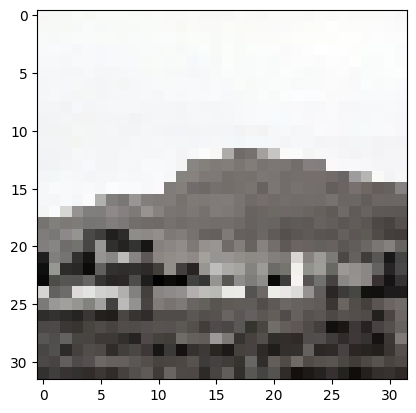

In [243]:
plt.imshow(X_train[0]);

In [244]:
Y_train[0]

'buildings'

In [246]:
def image_loader(file_path = str):
    X = []
    Y = []

    for folder in os.listdir(file_path):
        if os.path.isdir('/'.join([file_path, folder])):
            for file in os.listdir('/'.join([file_path, folder])):

                image = imread('/'.join([file_path, folder, file]))
                image = cv2.resize(image, (32, 32))

                X.append(image)
                Y.append(folder)

    return np.array(X), np.array(Y)

In [290]:
X_test, Y_test = image_loader(TEST_PATH)

In [249]:
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

X_test shape:  (3000, 32, 32, 3)
Y_test shape:  (3000,)


In [251]:
np.unique(Y_train)

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [263]:
labels_dict = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

In [291]:
Y_train = pd.Series(Y_train).map(labels_dict).values
Y_test = pd.Series(Y_test).map(labels_dict).values

In [271]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [270]:
Y_test.shape

(3000,)

## Normaliza

In [272]:
X_train.min()

0

In [273]:
X_train.max()

255

In [292]:
X_train_scal = X_train/255
X_test_scal = X_test/255

In [275]:
X_train_scal.min()

0.0

In [276]:
X_train_scal.max()

1.0

## Arquitectura de la red

In [277]:
X_train_scal[0].shape

(32, 32, 3)

In [278]:
len(np.unique(Y_train))

6

In [302]:
capas = [keras.layers.Conv2D(filters = 30, kernel_size = (3, 3), input_shape = (X_train_scal[0].shape), activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2)),
         
         keras.layers.Conv2D(filters = 15, kernel_size = (3, 3), activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2)),

         keras.layers.Flatten(),
         
         keras.layers.Dense(units = 150, activation = 'relu'),
         keras.layers.Dense(units = 100, activation = 'relu'),
         
         keras.layers.Dense(6, activation = 'softmax')]

model = keras.Sequential(capas)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

## Entrenamiento de la red

In [303]:
Y_train.shape

(14034,)

In [304]:
from sklearn.utils import shuffle

In [305]:
X_train_scal, Y_train = shuffle(X_train_scal, Y_train)

In [306]:
history = model.fit(X_train_scal, Y_train, validation_split= 0.20, epochs= 10)

Epoch 1/10
351/351 [==============================] - 13s 31ms/step - loss: 1.1594 - accuracy: 0.5437 - val_loss: 0.8937 - val_accuracy: 0.6519
Epoch 2/10
351/351 [==============================] - 12s 33ms/step - loss: 0.9069 - accuracy: 0.6576 - val_loss: 0.8568 - val_accuracy: 0.6779
Epoch 3/10
351/351 [==============================] - 11s 32ms/step - loss: 0.7935 - accuracy: 0.7046 - val_loss: 0.8332 - val_accuracy: 0.6847
Epoch 4/10
351/351 [==============================] - 10s 30ms/step - loss: 0.7277 - accuracy: 0.7339 - val_loss: 0.7420 - val_accuracy: 0.7250
Epoch 5/10
351/351 [==============================] - 12s 34ms/step - loss: 0.6799 - accuracy: 0.7570 - val_loss: 0.7029 - val_accuracy: 0.7439
Epoch 6/10
351/351 [==============================] - 11s 32ms/step - loss: 0.6261 - accuracy: 0.7730 - val_loss: 0.7144 - val_accuracy: 0.7439
Epoch 7/10
351/351 [==============================] - 10s 28ms/step - loss: 0.5856 - accuracy: 0.7928 - val_loss: 0.6373 - val_accuracy:

In [307]:
history.history

{'loss': [1.1593773365020752,
  0.906927764415741,
  0.7935243248939514,
  0.7277318835258484,
  0.6799037456512451,
  0.6260591745376587,
  0.5856116414070129,
  0.5402507185935974,
  0.48828864097595215,
  0.4577198624610901],
 'accuracy': [0.5436893105506897,
  0.6576111316680908,
  0.7045515179634094,
  0.7338559031486511,
  0.7570143342018127,
  0.7730470895767212,
  0.7928208708763123,
  0.8050236105918884,
  0.8255099058151245,
  0.8346842527389526],
 'val_loss': [0.8937174081802368,
  0.8567521572113037,
  0.8332411050796509,
  0.7420458197593689,
  0.7029261589050293,
  0.7144277691841125,
  0.6373465061187744,
  0.6521025896072388,
  0.7124199867248535,
  0.718724250793457],
 'val_accuracy': [0.6519415974617004,
  0.677947998046875,
  0.6847167611122131,
  0.7249732613563538,
  0.7438546419143677,
  0.7438546419143677,
  0.7659422755241394,
  0.7645173072814941,
  0.7363733649253845,
  0.7516921758651733]}

In [308]:
history_df = pd.DataFrame(history.history)

In [309]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.159377,0.543689,0.893717,0.651942
1,0.906928,0.657611,0.856752,0.677948
2,0.793524,0.704552,0.833241,0.684717
3,0.727732,0.733856,0.742046,0.724973
4,0.679904,0.757014,0.702926,0.743855
5,0.626059,0.773047,0.714428,0.743855
6,0.585612,0.792821,0.637347,0.765942
7,0.540251,0.805024,0.652103,0.764517
8,0.488289,0.825510,0.712420,0.736373
9,0.457720,0.834684,0.718724,0.751692


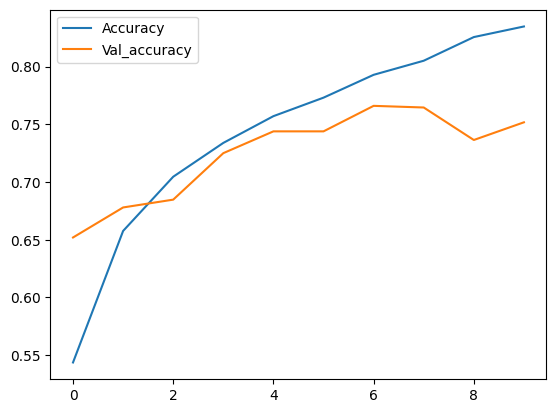

In [311]:
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'Val_accuracy')

plt.legend();

## Evaluación de modelo

In [312]:
model.evaluate(X_test_scal, Y_test)

94/94 [==============================] - 2s 17ms/step - loss: 0.7503 - accuracy: 0.7410


[0.7502961158752441, 0.7409999966621399]

In [316]:
model.predict(X_test_scal[[0]]).argmax()

1/1 [==============================] - 0s 85ms/step


0

In [317]:
labels_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

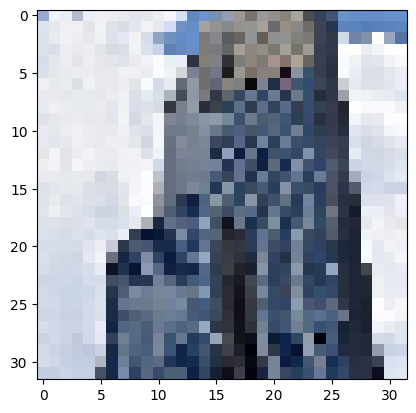

In [319]:
plt.imshow(X_test[0]);

In [338]:
y_test_pred = model.predict(X_test_scal)

94/94 [==============================] - 1s 8ms/step


In [340]:
y_test_pred = y_test_pred.argmax(axis = 1)

In [324]:
Y_test - y_test_pred

array([0, 0, 0, ..., 2, 5, 0], dtype=int64)

In [325]:
def non_zero_indices(arr):
    return [index for index, value in enumerate(arr) if value != 0]

In [341]:
for i in y_test_pred:
    print(i)

0
0
0
0
0
5
0
5
0
4
4
0
0
0
0
0
0
0
0
0
5
0
0
5
5
0
0
0
0
0
2
0
0
0
5
0
0
0
0
0
0
5
0
3
3
0
0
0
0
0
0
5
0
0
0
0
0
0
0
0
4
2
5
0
0
5
0
4
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
3
0
0
5
3
5
5
5
0
0
0
0
0
0
0
3
0
0
0
0
0
2
3
0
0
0
4
0
0
0
0
4
0
0
0
4
5
0
0
0
0
4
4
0
0
0
0
0
0
0
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
5
0
0
0
4
0
0
0
0
0
0
0
4
4
0
0
0
3
5
2
0
0
0
0
4
5
0
0
5
0
4
0
0
0
0
0
0
0
0
5
4
3
0
3
0
0
0
4
2
5
0
0
0
0
0
0
0
0
0
0
0
0
5
0
2
2
5
5
0
0
0
0
0
0
0
2
4
0
0
0
0
0
5
0
0
0
0
5
0
0
0
0
0
0
1
0
5
0
0
0
5
0
0
0
0
0
5
0
3
0
5
0
5
0
4
0
4
0
0
3
0
0
5
0
0
0
0
0
5
0
0
0
0
3
0
0
2
0
0
4
0
0
0
0
0
5
0
0
0
5
5
0
0
0
0
0
0
0
0
0
4
0
5
2
0
0
3
0
2
0
0
3
0
0
0
0
0
5
0
0
0
0
0
0
0
0
0
0
2
0
0
5
0
1
3
0
5
0
0
4
0
0
0
0
0
5
0
4
0
5
0
0
0
0
0
0
4
4
5
0
2
5
0
5
0
1
0
0
0
5
0
0
0
0
0
0
0
0
0
5
0
0
0
0
0
0
4
2
0
0
0
1
5
5
2
0
0
0
0
0
0
0
0
0
5
0
0
3
0
0
4
0
0
0
0
4
0
0
5
0
0
1
1
1
1
5
1
1
1
1
1
1
2
4
5
1
5
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
5
1
5
1
1
1
1
3
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1


In [326]:
non_zero_indices(Y_test - y_test_pred)

[5,
 7,
 9,
 10,
 20,
 23,
 24,
 30,
 34,
 41,
 43,
 44,
 51,
 60,
 61,
 62,
 65,
 67,
 79,
 83,
 86,
 87,
 88,
 89,
 90,
 98,
 104,
 105,
 109,
 114,
 118,
 119,
 124,
 125,
 135,
 154,
 156,
 160,
 168,
 169,
 173,
 174,
 175,
 180,
 181,
 184,
 186,
 195,
 196,
 197,
 199,
 203,
 204,
 205,
 218,
 220,
 221,
 222,
 223,
 231,
 232,
 238,
 243,
 250,
 252,
 256,
 262,
 264,
 266,
 268,
 270,
 272,
 275,
 278,
 284,
 289,
 292,
 295,
 301,
 305,
 306,
 316,
 318,
 319,
 322,
 324,
 327,
 333,
 344,
 347,
 349,
 350,
 352,
 355,
 361,
 363,
 365,
 372,
 373,
 374,
 376,
 377,
 379,
 381,
 385,
 395,
 402,
 403,
 407,
 408,
 409,
 410,
 420,
 423,
 426,
 431,
 434,
 441,
 448,
 449,
 450,
 452,
 463,
 468,
 470,
 475,
 478,
 497,
 504,
 506,
 515,
 520,
 523,
 525,
 529,
 530,
 531,
 548,
 554,
 558,
 563,
 575,
 576,
 578,
 590,
 594,
 595,
 598,
 601,
 602,
 605,
 608,
 617,
 620,
 626,
 630,
 631,
 632,
 636,
 638,
 642,
 650,
 656,
 658,
 670,
 671,
 679,
 681,
 684,
 687,
 688,
 69

In [344]:
model.predict(X_test_scal[[5]]).argmax()

1/1 [==============================] - 0s 45ms/step


5

In [345]:
labels_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [330]:
Y_test[5]

0

In [348]:
model.predict(X_test_scal[[5]])

1/1 [==============================] - 0s 43ms/step


array([[0.12610842, 0.03375194, 0.04550014, 0.26127493, 0.25432616,
        0.27903837]], dtype=float32)

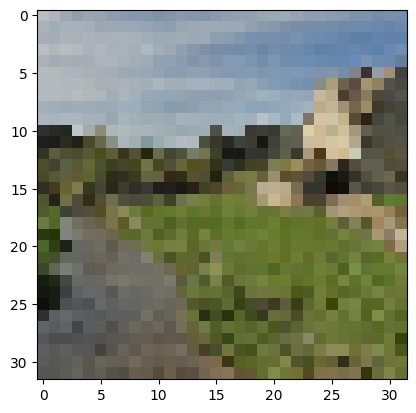

In [347]:
plt.imshow(X_test_scal[5]);

In [349]:
from sklearn.metrics import confusion_matrix

In [352]:
import seaborn as sns

In [354]:
labels_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

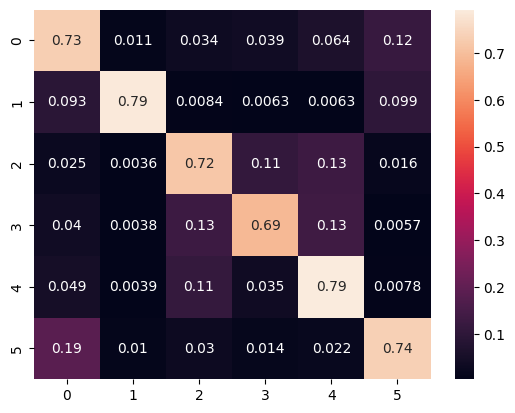

In [351]:
sns.heatmap(confusion_matrix(Y_test, y_test_pred, normalize = 'true'), annot = True);